# GUI to interact with the Mobile Robot of the Gazeboo simulation 

Thanks to this section the user will be able to command the Gazeboo-robot in the following modalities:
- Deciding a a certain x,y coordinates where the robot will drive to within a 1 minute time limit (*go to point*).
- Driving the robot using the key-board input commands (*Teleop key*).
- Adding an avoidance to the last mentioned modality (*Avoidance*).


In [7]:
from ipywidgets import Button, Layout, ButtonStyle, GridBox, VBox, HBox 
import ipywidgets as widgets
import rospy
import jupyros as jr
from std_msgs.msg import String
from IPython.display import display

from final_assignment.msg import Avoid
from geometry_msgs.msg import Twist

rospy.init_node('jupyter_node')
rospy.set_param('active', 0)

ok_left = 1
ok_right = 1
ok_straight = 1

avoid = 0

pub = rospy.Publisher('cmd_vel', Twist, queue_size = 1)

b1 = Button(description='Go to point',
            layout=Layout(width='auto', align="center", grid_area='b1'),
            style=ButtonStyle(button_color='lightblue'))

b2 = Button(description='Teleop-Key',
            layout=Layout(width='auto', grid_area='b2'),
            style=ButtonStyle(button_color='moccasin'))

b3 = Button(description='Avoidance',
            layout=Layout(width='auto', grid_area='b3'),
            style=ButtonStyle(button_color='pink'))

b4 = Button(description='Quit',
            layout=Layout(width='auto', grid_area='b4'),
            style=ButtonStyle(button_color='salmon'))

b5 = Button(description='Set x,y position',
            layout=Layout(width='auto', grid_area='b5'),
            style=ButtonStyle(button_color='lightgreen'))

# buttons for the teleop-key

b_forward = Button(description='Go straight',
            layout=Layout(width='auto', grid_area='straight'),
            style=ButtonStyle(button_color='lightblue'))
b_backward = Button(description='Go backwards',
            layout=Layout(width='auto', grid_area='backward'),
            style=ButtonStyle(button_color='lightblue'))
b_left = Button(description='Go left',
            layout=Layout(width='auto', grid_area='left'),
            style=ButtonStyle(button_color='lightblue'))
b_right = Button(description='Go right',
            layout=Layout(width='auto', grid_area='right'),
            style=ButtonStyle(button_color='lightblue'))

b_stop = Button(description='stop',
            layout=Layout(width='auto', grid_area='stop'),
            style=ButtonStyle(button_color='salmon'))


output = widgets.Output()

des_x = widgets.FloatText()
des_y = widgets.FloatText()

des_x_input = 0
des_y_input = 0


def cb_avoidence(msg):

    global ok_left
    global ok_right
    global ok_straight
    global pub 
    
    twist = Twist()
    ok_right = msg.right
    ok_straight = msg.front
    ok_left = msg.left
    
    if ok_straight == 0:
        twist.linear.x = 0
        
    if ok_left == 0:
        twist.angular.z = 0
        
    if ok_right == 0:
        twist.angular.z = 0
        
    pub.publish(twist)
    
    
    
    
def on_button_clicked_Go_to_point(b): 
    global avoid
    avoid = 0
    
    print("Set the desired (x,y) position then push the button to set it: ")
    
    display(des_x)
    display(des_y)
    
    display(b5,output)
    
    
def on_button_clicked_Teleop_Key(b):
    global avoid
    avoid = 0
    
    print("Button clicked: " + str(b.description))
    rospy.set_param('active', 2)
    
    display(GridBox(children=[b_forward, b_backward, b_left, b_right,b_stop],
        layout=Layout(
       
            width='40%',
            grid_template_rows='auto',
            grid_template_columns='33% 33% 33%',
            grid_template_areas='''
            ". straight ."
            "left stop right"
            ". backward ."
            ''')  
       ))
    
def on_button_clicked_Avoidence(b): 
    global avoid
    avoid = 1
    
    print("Button clicked: " + str(b.description))
    rospy.set_param('active', 3)
    
    display(GridBox(children=[b_forward, b_backward, b_left, b_right,b_stop],
        layout=Layout(
       
            width='40%',
            grid_template_rows='auto',
            grid_template_columns='33% 33% 33%',
            grid_template_areas='''
            ". straight ."
            "left stop right"
            ". backward ."
            ''')  
       ))
    
def on_button_clicked_Quit(b): 
    global avoid
    avoid = 0
    
    print("Button clicked: " + str(b.description))
    rospy.set_param('active', 0)

def set_position(b):
    global des_x
    global des_y
    
    print("Button clicked: position set")
    rospy.set_param('des_pos_x', des_x.value)
    rospy.set_param('des_pos_y', des_y.value)
    rospy.set_param('active', 1)

    
def move_straight(b):
    global ok_straight
    global pub
    global avoid 
    
    twist = Twist()
    
    if avoid == 1:
        if ok_straight == 1:
            twist.linear.x = 1
            
        else:
            twist.linear.x = 0
    else:
        twist.linear.x = 1

    pub.publish(twist)

def move_left(b):
    global ok_left
    global pub
    global avoid 
    
    twist = Twist()
    
    if avoid == 1:
        if ok_left == 1:
            twist.angular.z = 1

        else:
            twist.angular.z = 0
    else:
        twist.angular.z = 1
    
        
    pub.publish(twist)
    
def move_right(b):
    global ok_right
    global pub
    global avoid 
    
    twist = Twist()
    if avoid == 1:
        if ok_right == 1:
            twist.angular.z = -1

        else:
            twist.angular.z = 0
    else:
        twist.angular.z = -1
        
    pub.publish(twist)
    
def move_back(b):
    global pub
    
    twist = Twist()
    twist.linear.x = -1
        
    pub.publish(twist)

def stopped(b):
    global pub
    twist = Twist()
    # Publish stop message when thread exits.
    
    twist.linear.x = 0
    twist.linear.y = 0
    twist.linear.z = 0
    twist.angular.x = 0
    twist.angular.y = 0
    twist.angular.z = 0
    
    pub.publish(twist)

rospy.Subscriber("custom_controller", Avoid, cb_avoidence)   

b1.on_click(on_button_clicked_Go_to_point)
b2.on_click(on_button_clicked_Teleop_Key)
b3.on_click(on_button_clicked_Avoidence)
b4.on_click(on_button_clicked_Quit)

b5.on_click(set_position)

b_forward.on_click(move_straight)
b_backward.on_click(move_back)
b_left.on_click(move_left)
b_right.on_click(move_right)

b_stop.on_click(stopped)

print("Choose any of the following modalities: ")

GridBox(children=[b1, b2, b3, b4],
        layout=Layout(
       
            width='40%',
            grid_template_rows='auto auto',
            grid_template_columns='50% 50%',
            grid_template_areas='''
            "b1 b2 "
            "b3 b4 "
            ''')  
       )

Choose any of the following modalities: 


GridBox(children=(Button(description='Go to point', layout=Layout(grid_area='b1', width='auto'), style=ButtonS…

# Graphs of the robot's odometry and laser-scanner array
This section of the code will show the user what the robot perception of the surroundings is.
- The first graph shows the position described by the odometry topic of the robot. The graph will show the position of the robot in space with red dots. 
- The second graph shows the values retrieved by the laser scan arrays the robot is equipped with. 
- The third graph shows the same thing as the previous one but on a polar graph representation.


<IPython.core.display.Javascript object>


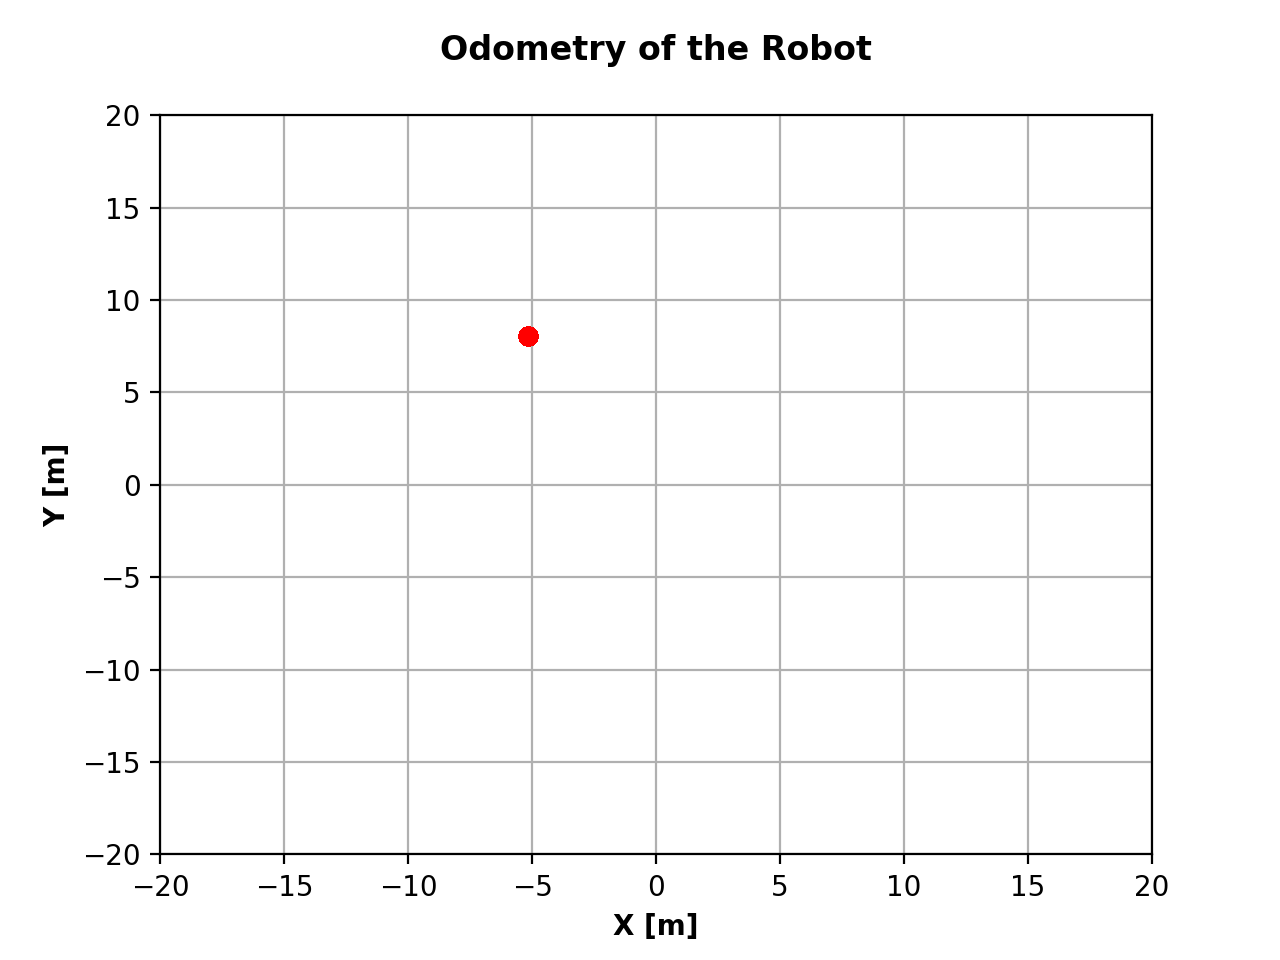

<IPython.core.display.Javascript object>


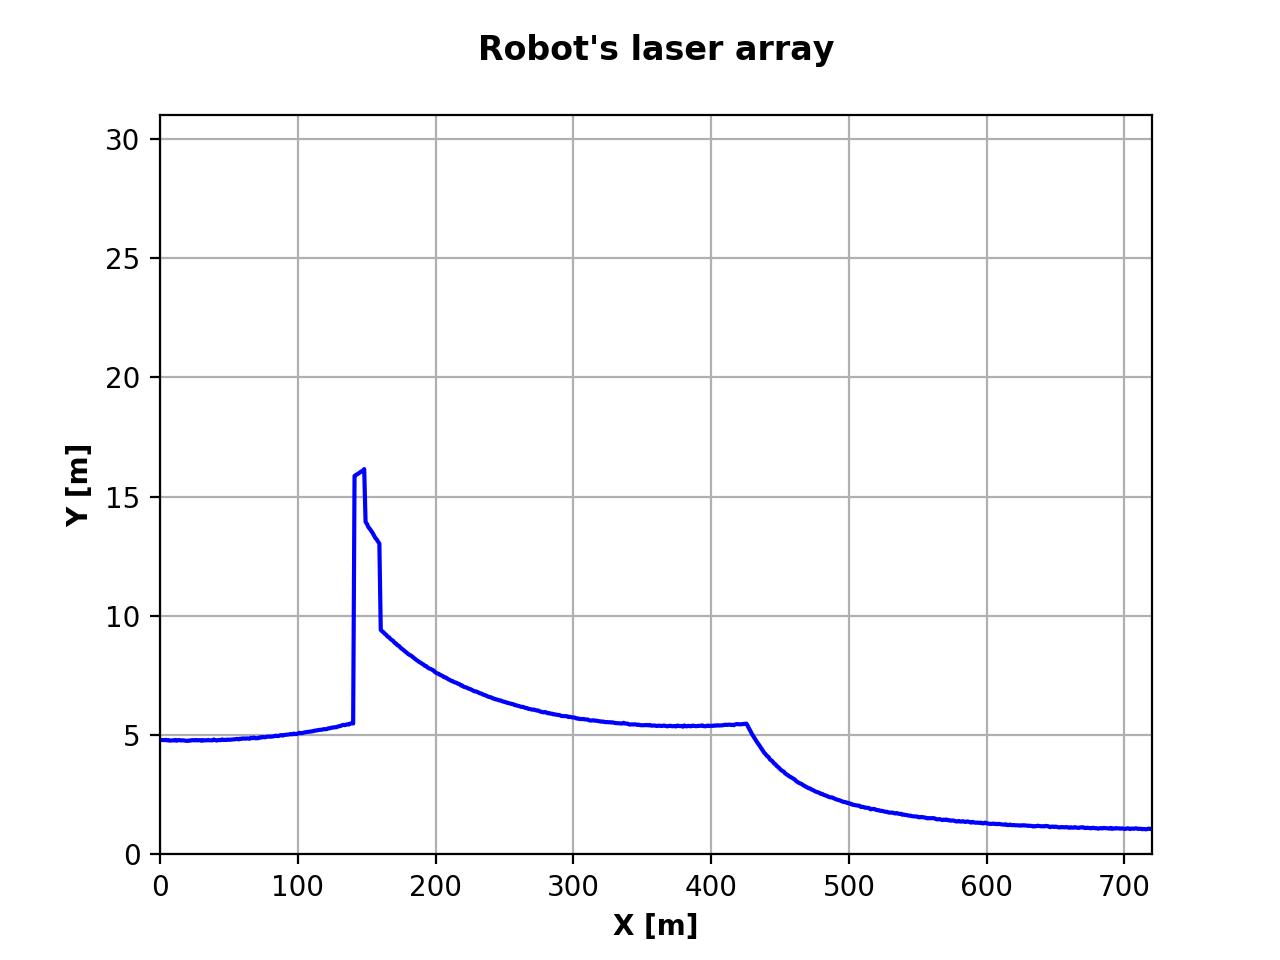

<IPython.core.display.Javascript object>


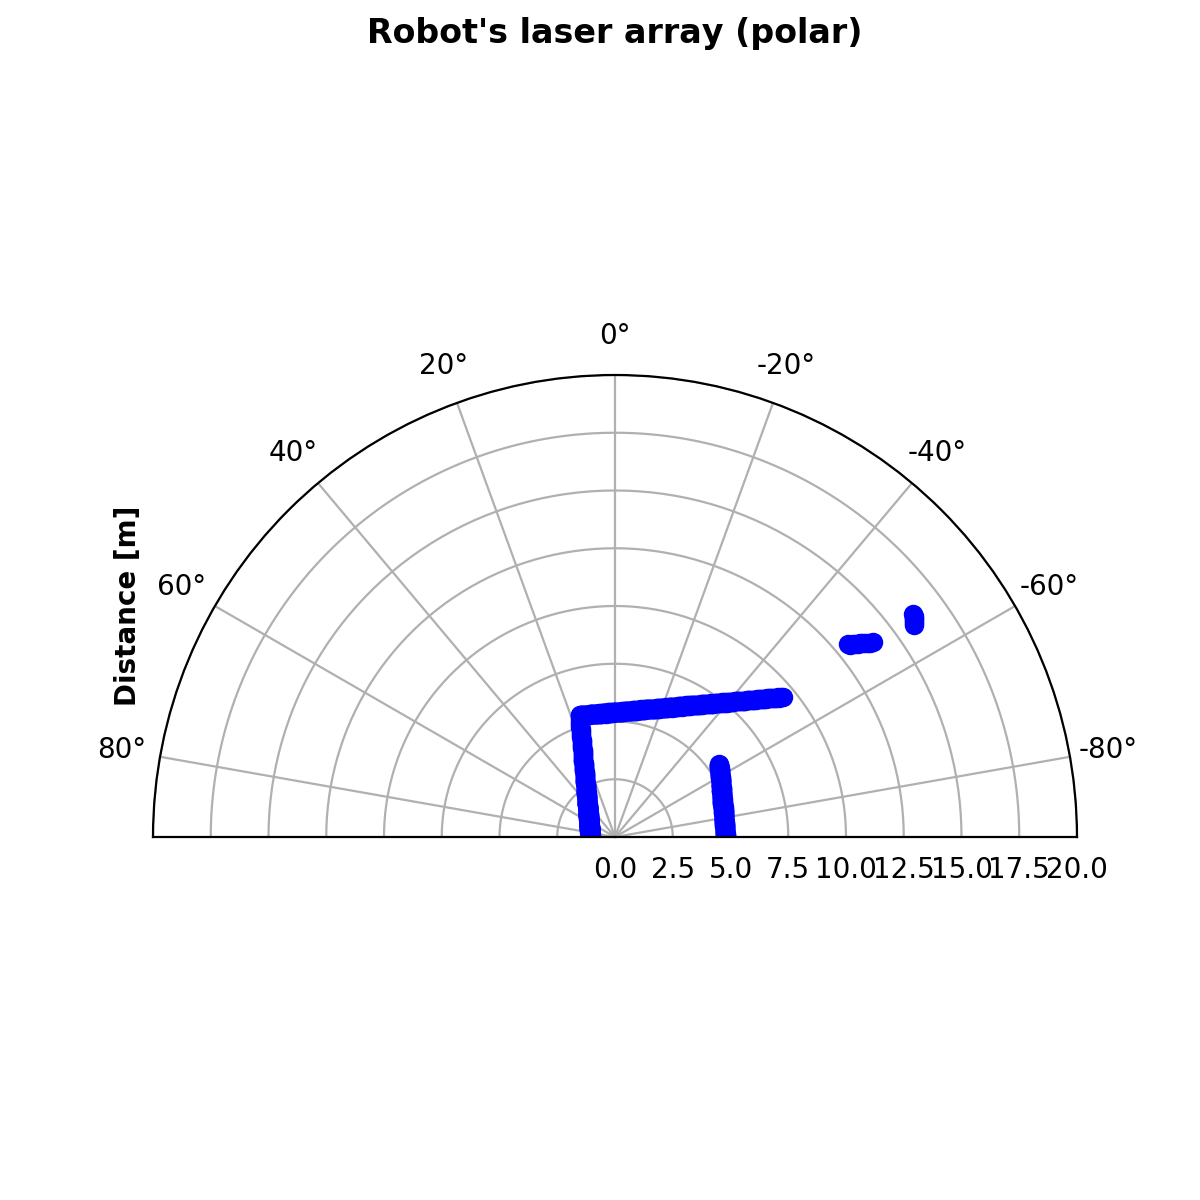

In [2]:
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import rospy
import tf
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from sensor_msgs.msg import LaserScan
from move_base_msgs.msg import MoveBaseActionGoal 
from nav_msgs.msg import Odometry
from actionlib_msgs.msg import GoalStatusArray
import time

angles = []

class Visualiser:
    
    def __init__(self):
        self.fig, self.ax = plt.subplots() 
        self.ln, = plt.plot([], [], 'ro')
        plt.grid(True)
        
        self.fig2,self.ax2 = plt.subplots()
        self.ln2,= plt.plot([], [], 'b-')
        plt.grid(True)
        
        self.figp = plt.figure(figsize=(6,6))
        self.ax_p = plt.subplot(111, polar=True)
        self.ax_p.set_thetalim(-np.pi/2,np.pi/2)
        
        self.ax_p.set_theta_zero_location("N")
        self.lnp, = self.ax_p.plot([],[],'bo')
        plt.grid(True)
        
        self.x_data, self.y_data = [] , []
        self.scanner = []
        
        
    def plot_init(self): 
        
        self.ax.set_title("Odometry of the Robot\n",fontweight="bold")
        self.ax.set_xlim(-20, 20) 
        self.ax.set_ylim(-20, 20) 
        self.ax.set_xlabel("X [m]",fontweight="bold")
        self.ax.set_ylabel("Y [m]",fontweight="bold")
        
        self.ax2.set_title("Robot's laser array\n",fontweight="bold")
        self.ax2.set_xlim(0, 720)
        self.ax2.set_ylim(0,31)
        self.ax2.set_xlabel("X [m]",fontweight="bold")
        self.ax2.set_ylabel("Y [m]",fontweight="bold")
        
        self.ax_p.set_title("Robot's laser array (polar)\n",fontweight="bold")
        self.ax_p.set_ylabel("Distance [m]",fontweight="bold")
        self.ax_p.set_rmax(20)
        
        return self.ln, self.ln2, self.lnp
        
    
    def odom_callback(self, msg): 
        
        self.y_data.append(msg.pose.pose.position.y) 
        self.x_data.append(msg.pose.pose.position.x)
        
    def cb_laser(self, msg): 
        
        global angles 
        
        self.scanner = list(msg.ranges)
        angles = list(np.arange(msg.angle_min, msg.angle_max + msg.angle_increment, msg.angle_increment))
        
        return self.scanner
        
        
    def update_plot(self, frame): 
        
        self.ln.set_data(self.x_data, self.y_data) 
        
        return self.ln
    
    def update_plot2(self, frame):
        
        self.ln2.set_data(list(np.linspace(0,720,720)),self.scanner)
        
        return self.ln2
    
    def update_polar(self, frame):
        
        global angles 
        
        self.lnp.set_data(angles,self.scanner)
        return self.lnp


#rospy.init_node('data_visualization')

vis = Visualiser()

sub3 = rospy.Subscriber('/odom', Odometry, vis.odom_callback)

sub2 = rospy.Subscriber('/scan', LaserScan, vis.cb_laser)

ani3 = FuncAnimation(vis.fig, vis.update_plot, init_func = vis.plot_init) 
ani2= FuncAnimation(vis.fig2, vis.update_plot2, init_func = vis.plot_init)
anip= FuncAnimation(vis.figp,vis.update_polar,init_func = vis.plot_init)

plt.show(block=True)

# Plot of the reached and unreached goals inside the map
The graph will show the reached and unreached locations of the robot:
- The yellow dots will show the location the robot is driving towards. 
- The red dots will show the unreached locations.
- The green ones will show the reached locations.

<IPython.core.display.Javascript object>


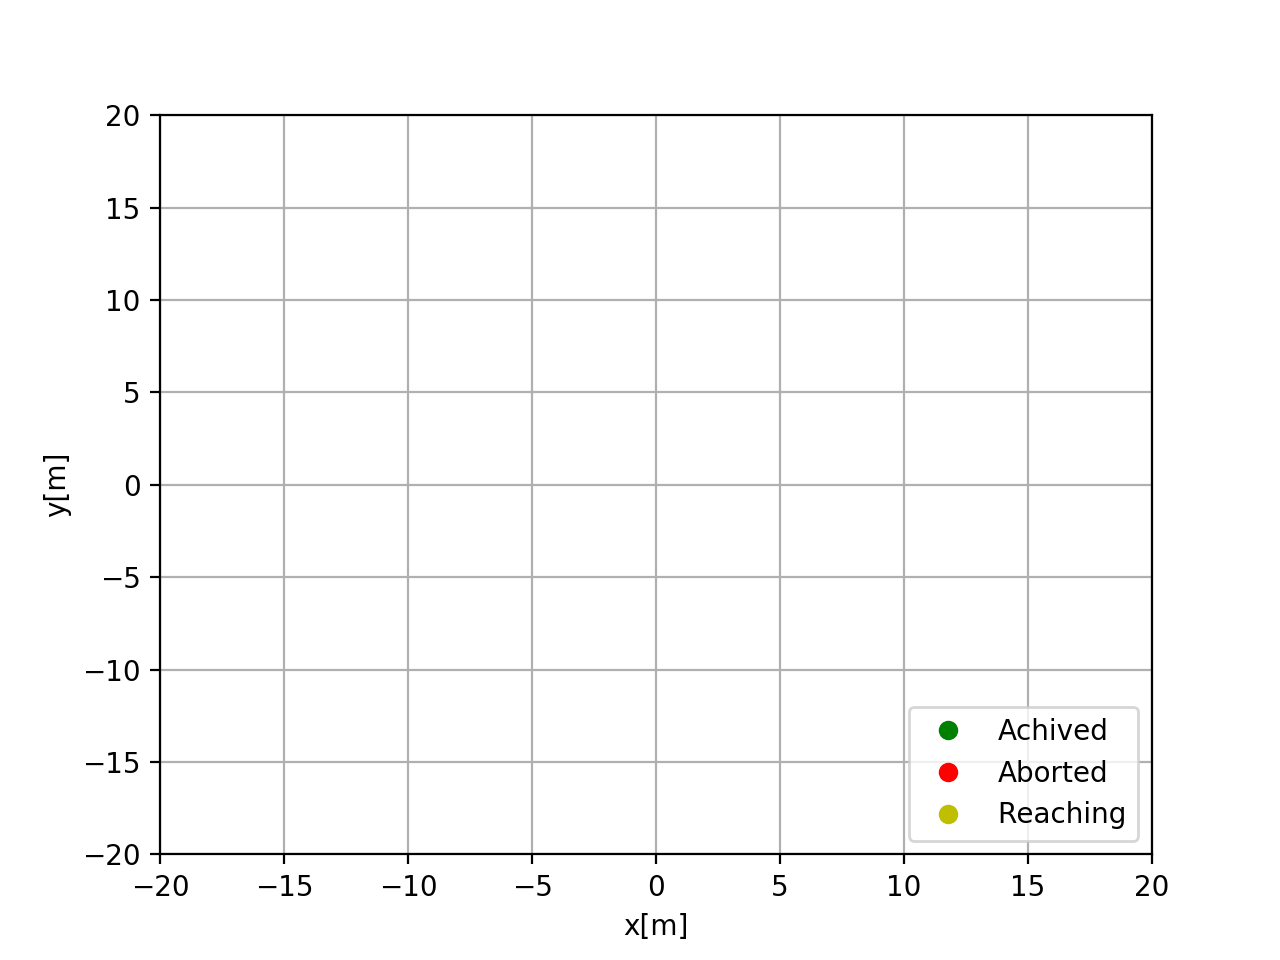

In [4]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import rospy
import tf
from tf.transformations import quaternion_matrix 
import numpy as np
from matplotlib.animation import FuncAnimation
from actionlib_msgs.msg import GoalStatusArray

#rospy.init_node('target_node')

status = [0,0]

pos_x = 0
pos_y = 0

class Visualiser:
    
    def __init__(self):
        self.fig, self.ax = plt.subplots() 
        self.ln_g, = plt.plot([], [], 'go',label='Achived')
        self.ln_r, = plt.plot([], [], 'ro',label='Aborted')
        self.ln_x, = plt.plot([], [], 'yo',label='Reaching')
        
        plt.grid()
        plt.xlabel("x[m]")
        plt.ylabel("y[m]")
        plt.legend(handles=[self.ln_g, self.ln_r,self.ln_x], loc='lower right')
        
        self.x_data_g, self.y_data_g = [] , []
        self.x_data_r, self.y_data_r = [] , []
        self.x_data_x, self.y_data_x = [] , []
        
    def plot_init(self): 
        self.ax.set_xlim(-20, 20) 
        self.ax.set_ylim(-20, 20) 
        
        return self.ln_g, self.ln_r, self.ln_x
    
    def status_cb(self, msg): 
        
        global status 
        global pos_x
        global pos_y
        
        try:
            status.append(msg.status_list[0].status)

            pos_x = rospy.get_param("des_pos_x")
            pos_y = rospy.get_param("des_pos_y")


            if status[-1] == 1 and status[-2] != 1:

                self.y_data_x.append(pos_y) 
                self.x_data_x.append(pos_x)

            elif (status[-1] == 2 and status[-2] != 2) or (status[-1] == 4 and status[-2] != 4):

                self.y_data_x.clear()
                self.x_data_x.clear()
                self.y_data_r.append(pos_y) 
                self.x_data_r.append(pos_x)

            elif status[-1] == 3 and status[-2] != 3:

                self.y_data_x.clear()
                self.x_data_x.clear()
                self.y_data_g.append(pos_y) 
                self.x_data_g.append(pos_x)
                
        except IndexError:
            pass
        
    
    def update_plot(self, frame):
        
        self.ln_g.set_data(self.x_data_g, self.y_data_g)
        self.ln_r.set_data(self.x_data_r, self.y_data_r)
        self.ln_x.set_data(self.x_data_x, self.y_data_x)

        return self.ln_g,self.ln_r,self.ln_xe
            
       
        

vis2 = Visualiser()
sub = rospy.Subscriber('/move_base/status', GoalStatusArray, vis2.status_cb)

ani = FuncAnimation(vis2.fig, vis2.update_plot, init_func = vis2.plot_init)


plt.show(block=True)


# Bar plot of the reached and unreached locations
This bar-plot will show in red the amount of locations not reached by the robot and in green the reached ones. 

<IPython.core.display.Javascript object>


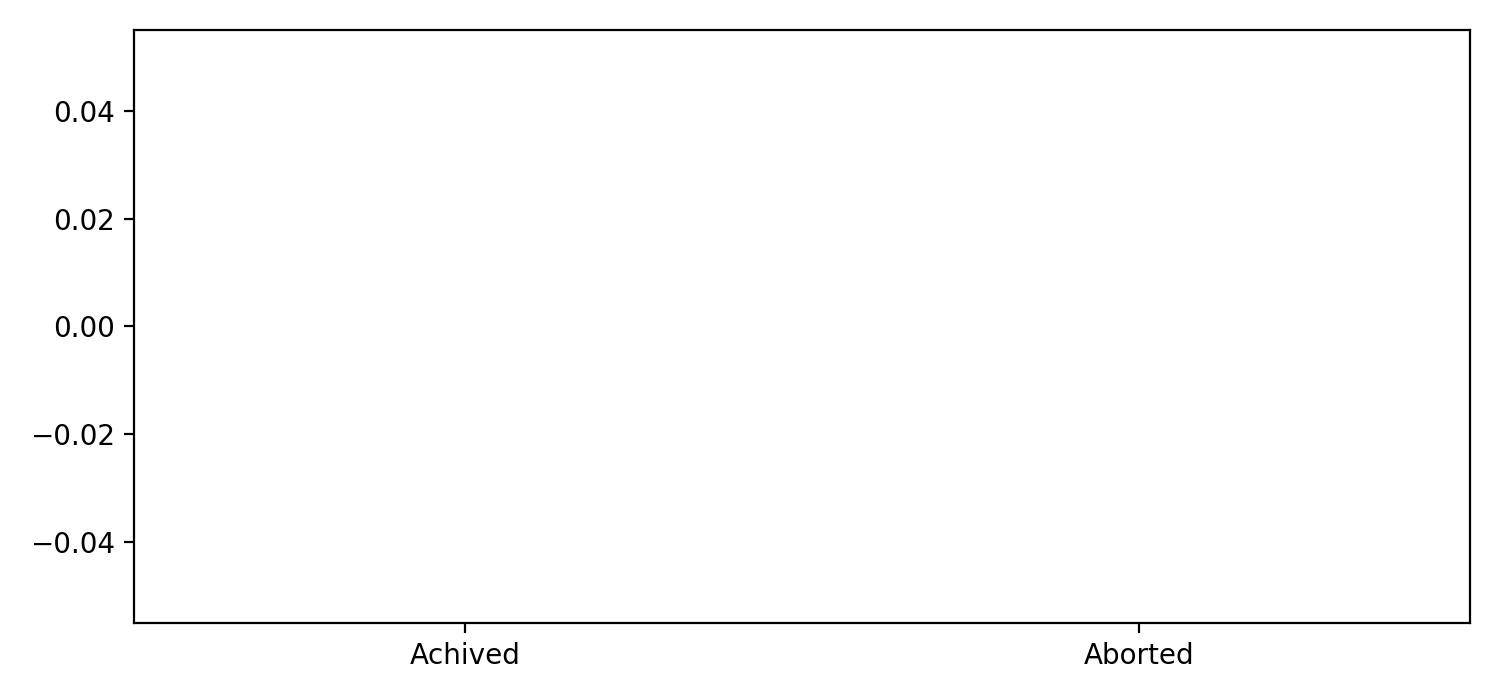

In [6]:
%matplotlib notebook
%matplotlib notebook

import numpy as np
from matplotlib import animation as animation, pyplot as plt, cm
from actionlib_msgs.msg import GoalStatusArray
import rospy

#rospy.init_node('bar_node')

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()


data = [0 , 0]

g = 0
r = 0

status = [0 , 0]

bars = plt.bar(["Achived","Aborted"], data, color = ['green', 'red'])



def status_cb(msg): 

    global status 
    global g
    global r
    
    try: 
        
        status.append(msg.status_list[0].status)

        if status[-1] == 3 and status[-2] != 3:
            g = g + 1

        elif status[-1] == 2 and status[-2] != 2:
            r = r + 1

        elif status[-1] == 4 and status[-2] != 2:
            r = r + 1
            
            
    except IndexError:
        pass

    
def bar_update(frame):
    
    global bars
    global g
    global r
    
    g_ = g
    r_ = r
    data_ = [g_, r_]
    
    bars = plt.bar(["Achived","Aborted"], data_, color = ['green', 'red'])

    
sub4 = rospy.Subscriber('/move_base/status', GoalStatusArray, status_cb)

ani5 = animation.FuncAnimation(fig, bar_update, interval = 100)

plt.show()